In [7]:
# Imports and stuff
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import random
from random import randrange
import time
import csv as csv
import statistics
import pandas
from pandas import DataFrame

In [8]:
# Printing and ploting
def plot_graph(adj_matrix):
    # Create a graph object
    G = nx.from_numpy_array(adj_matrix)
    # Plot the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


def create_csv_sum_file():
    filename = "sum.csv"
    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['Date', 'Graph Type', 'Graph Size', 'Start Node', 'Times To Run', 'Average Steps',
                      'Max Steps', 'Min Steps', 'Standard Deviation']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

create_csv_sum_file()


def write_to_sum_file(graph_type, graph_size, start_node, times_to_run, average_steps, max_steps, min_steps, standard_deviation):
    filename = "sum.csv"
    with open(filename, 'a', newline='') as csvfile:
        fieldnames = ['Date', 'Graph Type', 'Graph Size', 'Start Node', 'Times To Run', 'Average Steps',
                      'Max Steps', 'Min Steps', 'Standard Deviation']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        timestr = time.strftime("%Y%m%d-%H%M%S")
        writer.writerow({'Date': timestr, 'Graph Type': graph_type, 'Graph Size': graph_size, 'Start Node': start_node,
                     'Times To Run': times_to_run, 'Average Steps': average_steps, 'Max Steps': max_steps,
                     'Min Steps': min_steps, 'Standard Deviation':standard_deviation})


In [9]:
# Graph creators
def createAClique(sizeOfGraph):
    return np.full((sizeOfGraph, sizeOfGraph), 1)


def createARing(sizeOfGraph):
    graph = np.full((sizeOfGraph, sizeOfGraph), 0)
    for i in range(sizeOfGraph):
        for j in range (sizeOfGraph):
            if i==j:
                graph[i][j] = 1
            elif i==(j+1)%sizeOfGraph:
                graph[i][j] = 1
                graph[j][i] = 1
    return graph


def createACandy(sizeOfGraph):
    graph = np.full((sizeOfGraph, sizeOfGraph), 0)
    for i in range (sizeOfGraph):
        for j in range (sizeOfGraph):
            if i<=sizeOfGraph/2 and j<=sizeOfGraph/2:
                if i==j:
                    graph[i][j] = 1
                if i==j+1:
                    graph[i][j] = 1
                    graph[j][i] = 1
            if i>=sizeOfGraph/2 and j>=sizeOfGraph/2:
                graph[i][j] = 1
    return graph


def createTwoCliques(sizeOfGraph):
    graph = np.full((sizeOfGraph, sizeOfGraph), 0)
    for i in range(sizeOfGraph):
        for j in range(sizeOfGraph):
            #e1
            if i < sizeOfGraph / 2 and j < sizeOfGraph / 2:
                if i == j:
                    graph[i][j] = 1
                if i == j + 1:
                    graph[i][j] = 1
                    graph[j][i] = 1
            #e2
            if i > (sizeOfGraph / 2) - 1 and j > (sizeOfGraph / 2) - 1 and i<(3*sizeOfGraph)/4 and j<(3*sizeOfGraph)/4:
                graph[i][j] = 1
            #e3
            if i > (3*sizeOfGraph)/4 - 1 and j > (3*sizeOfGraph) / 4 -1:
                graph[i][j] = 1
            #e4
            graph[0][int(sizeOfGraph/2)] = 1
            graph[int(sizeOfGraph/2)][0] = 1
            graph[int((sizeOfGraph/2))-1][int(3*sizeOfGraph/4)] = 1
            graph[int(3*sizeOfGraph/4)][int((sizeOfGraph/2))-1] = 1
    return graph


In [10]:
# Functions for Question 1
def normalize_graph(arr):
    row_sums = np.sum(arr, axis=1, keepdims=True)
    normalized_arr = arr / row_sums
    return normalized_arr


def random_walk_time(adj_matrix, start_node):
    """
    Function that implements a random walk on a normalized adjacency matrix and returns the total running time and number of steps taken
    :param adj_matrix: Normalized adjacency matrix of the graph
    :param start_node: Starting node for the random walk
    :return: Total running time and number of steps taken during the random walk
    """
    num_nodes = adj_matrix.shape[0]
    current_node = start_node
    visited_nodes = set([current_node])

    start_time = time.time()
    num_steps = 0

    while len(visited_nodes) < num_nodes:
        neighbors = np.nonzero(adj_matrix[current_node])[0]
        next_node = np.random.choice(neighbors, p=adj_matrix[current_node][neighbors])
        visited_nodes.add(next_node)
        current_node = next_node
        num_steps += 1

    end_time = time.time()
    total_time = end_time - start_time

    return total_time, num_steps


def run_random_walks(adj_matrix, start_node, times_to_run, graph_type):
    timestr = time.strftime("%Y%m%d-%H%M%S")
    filename= graph_type + "_starting_node_" + str(start_node) + "_running_" + str(times_to_run) + "_times_at_" + timestr +".csv"

    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['Graph Type','Graph Size','Start Node','Run Number', 'Steps', 'Time']  # Header row fieldnames
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()  # Write the header row
        results = []
        steps_per_run=[]
        totalSteps = 0

        for i in range(times_to_run):
            run_time, steps_count = random_walk_time(adj_matrix, start_node)
            results.append((run_time, steps_count))
            totalSteps=totalSteps+steps_count
            steps_per_run.append(steps_count)
            print("run number: " + str(i+1) +" finished in: "+str(run_time))
            writer.writerow({'Graph Type': graph_type,'Graph Size': adj_matrix.shape[0],'Start Node':start_node,'Run Number': i+1, 'Steps': steps_count, 'Time': run_time})

        min_steps = min(results)[1]
        max_steps = max(results)[1]
        avg_steps = totalSteps / times_to_run
        print("max: " + str(max_steps))
        print("min: " + str(min_steps))
        print("avg: " + str(avg_steps))
        print("res: " )
        print(results)
        steps_deviation = statistics.stdev(steps_per_run)
        write_to_sum_file(graph_type,adj_matrix.shape[0],start_node,times_to_run,avg_steps,max_steps,min_steps, steps_deviation)

    return


def run_random_walks_with_random_starting_node(adj_matrix, times_to_run, graph_type):
    timestr = time.strftime("%Y%m%d-%H%M%S")
    filename= graph_type + "_starting_node_" + "random" + "_running_" + str(times_to_run) + "_times_at_" + timestr +".csv"

    with open(filename, 'w', newline='') as csvfile:
        fieldnames = ['Graph Type','Graph Size','Start Node','Run Number', 'Steps', 'Time']  # Header row fieldnames
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()  # Write the header row
        results = []
        steps_per_run=[]
        totalSteps = 0
        start_node = 0



        for i in range(times_to_run):
            start_node= randrange(adj_matrix.shape[0])
            run_time, steps_count = random_walk_time(adj_matrix, start_node)
            results.append((run_time, steps_count))
            totalSteps=totalSteps+steps_count
            steps_per_run.append(steps_count)
            print("run number: " + str(i+1) +" finished in: "+str(run_time))
            writer.writerow({'Graph Type': graph_type,'Graph Size': adj_matrix.shape[0],'Start Node':start_node,'Run Number': i+1, 'Steps': steps_count, 'Time': run_time})

        min_steps = min(results)[1]
        max_steps = max(results)[1]
        avg_steps = totalSteps / times_to_run
        print("max: " + str(max_steps))
        print("min: " + str(min_steps))
        print("avg: " + str(avg_steps))
        print("res: " )
        print(results)
        steps_deviation = statistics.stdev(steps_per_run)
        write_to_sum_file(graph_type,adj_matrix.shape[0],start_node,times_to_run,avg_steps,max_steps,min_steps, steps_deviation)

    return


def limited_random_walk_with_random_starting_node(adj_matrix, numOfSteps):
    """
    Function that implements a random walk on a normalized adjacency matrix and returns the total running time and number of steps taken
    :param adj_matrix: Normalized adjacency matrix of the graph
    :param start_node: Starting node for the random walk
    :return: Total running time and number of steps taken during the random walk
    """
    num_nodes = adj_matrix.shape[0]
    start_node = random.randint(0, num_nodes-1)

    current_node = start_node
    visited_nodes = set([current_node])

    start_time = time.time()
    num_steps = 0

    # print("Start node: " + str(start_node))

    for i in range (numOfSteps):
        neighbors = np.nonzero(adj_matrix[current_node])[0]
        next_node = np.random.choice(neighbors, p=adj_matrix[current_node][neighbors])
        visited_nodes.add(next_node)
        current_node = next_node


    end_time = time.time()
    total_time = end_time - start_time
    # print("Steps made: " + str(numOfSteps))
    # print("Running time: " + str(total_time))
    # print("Last node visited: " + str(current_node))

    return current_node


def run_multiple_limited_random_walk_stac_vector(adj_matrix, numOfRuns, numOfSteps):
    results = np.full((adj_matrix.shape[0]), 0)
    for i in range (numOfRuns):
        last_node = limited_random_walk_with_random_starting_node(adj_matrix, numOfSteps)
        results[last_node] = results[last_node]+1
    results = np.divide(results, numOfRuns)
    return results

In [11]:
# Functions for Question 2
def page_rank_algo(adj_matrix, numOfSteps, changeFromResults, resultsToCompare):
    numOfRuns = 0
    newResultsNormalized = np.full((adj_matrix.shape[0]), 0)
    countOfLastNodes = np.full((adj_matrix.shape[0]), 0)
    reachedChangeFromResults=False
    while not reachedChangeFromResults:
        currentLastNode = limited_random_walk_with_random_starting_node(adj_matrix, numOfSteps)
        countOfLastNodes[currentLastNode] = countOfLastNodes[currentLastNode] + 1
        numOfRuns += 1
        newResultsNormalized = np.divide(countOfLastNodes, numOfRuns)
        reachedChangeFromResults = compareVectors(resultsToCompare, newResultsNormalized, changeFromResults)

    return numOfRuns


def compareVectors(resultsToCompare, newResultsNormalized, changeFromResults):
    dist = np.linalg.norm(resultsToCompare - newResultsNormalized)
    return dist <= changeFromResults

In [12]:
# Functions for Question 3
def power_iteration(A, change, b_k):
    condition =  False
    step = 0

    while not condition:
        step += 1
        print('STEP %d' %(step))
        # Multiplying A and b_k
        Ab_k1 = np.matmul(A,b_k)
        print('Ab_k1: ', Ab_k1)
        # Magnitude of Ab_k1
        Ab_k1_mag = math.sqrt(sum(pow(element, 2) for element in Ab_k1))
        print('Ab_k1_mag: ', Ab_k1_mag)
        # Finding Eigen Vector  
        Ab_k2 = Ab_k1/Ab_k1_mag
        print('Eigen Vector: ', Ab_k2)
        # Prints Eigen value and step
        print('----------')
        
        # Comparing vectors with the given change
        condition = compareVectors(Ab_k1, Ab_k2, change)

        # Updating b_k
        b_k = Ab_k2
        
    return Ab_k2


def power_iteration_test(A, x, tol, max_iter):
  
    # Choose the initial vector x
    
    # Define the variable lam_prev to store the
    # previous approximation for the largest eigenvalue
    lam_prev = 0
    
    # Iteratively improve the approximations
    # for the largest eigenvalue and eigenvector
    # using the power method
    for i in range(max_iter):
        # Compute the updated approximation for the eigenvector
        x = A @ x / np.linalg.norm(A @ x)
    
        # Compute the updated approximation for the largest eigenvalue
        lam = (x.T @ A @ x) / (x.T @ x)
    
        # Check if the approximations have converged
        if np.abs(lam - lam_prev) < tol:
            break
    
        # Store the current approximation for the largest eigenvalue
        lam_prev = lam
    
    # Print the approximations for the
    # largest eigenvalue and eigenvector
    print(float(lam))
    print(x)


In [ ]:
### QUESTION 2 ###

### Question 2.1 ### 
# find the stationary vector of the narmalized graphs

clique_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_Clique, 5000, 1)
candy_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_Candy, 5000, 2000)
ring_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_Ring, 5000, 2000)
twoCliques_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_TwoCliques, 5000, 2000)

In [ ]:
### Question 2.2 ###
error_rate = [0.25, 0.125, 0.0625, 0.03125, 0.015625]
num_of_steps = [4, 8, 16, 32, 64]
print("### Q2 ###")

#TODO: run on the 2^14 graph
#TODO: start runs from specific node [clique - (random, 0), candy - (random, from clique), ring - (random, 0), twoCliques - (random, from clique)]
#TODO: avg the results into a file (run 10 times for each option)

In [ ]:
#Q2 - Two Cliques
curr_graph = normalize_TwoCliques
print("Graph: Two Cliques")
print("=====================================")
for j in range(len(num_of_steps)):
    print("## Number of steps: " + str(num_of_steps[j]))
    for i in range(len(error_rate)):
        print("---- Error rate:  " + str(error_rate[i]))
        num_of_runs = page_rank_algo(curr_graph, num_of_steps[j], error_rate[i], clique_stationary_vector)
        print("     num of runs: " + str(num_of_runs))
    print("=====================================")

In [ ]:
#Q2 - Clique
curr_graph = normalize_Clique
print("Graph: Clique")
print("=====================================")
for j in range(len(num_of_steps)):
    print("## Number of steps: " + str(num_of_steps[j]))
    for i in range(len(error_rate)):
        print("---- Error rate:  " + str(error_rate[i]))
        num_of_runs = page_rank_algo(curr_graph, num_of_steps[j], error_rate[i], clique_stationary_vector)
        print("     num of runs: " + str(num_of_runs))
    print("=====================================")

In [ ]:
print("### Q2 ###")
error_rate = [0.25, 0.125, 0.0625, 0.03125, 0.015625]
curr_graph = normalize_Candy
print("Graph: Candy")
print("=====================================")
for j in range(len(num_of_steps)):
    print("## Number of steps: " + str(num_of_steps[j]))
    for i in range(len(error_rate)):
        print("---- Error rate:  " + str(error_rate[i]))
        num_of_runs = page_rank_algo(curr_graph, num_of_steps[j], error_rate[i], clique_stationary_vector)
        print("     num of runs: " + str(num_of_runs))
    print("=====================================")

In [ ]:
#Q2 - Ring
curr_graph = normalize_Ring
print("Graph: Ring")
print("=====================================")
for j in range(len(num_of_steps)):
    print("## Number of steps: " + str(num_of_steps[j]))
    for i in range(len(error_rate)):
        print("---- Error rate:  " + str(error_rate[i]))
        num_of_runs = page_rank_algo(curr_graph, num_of_steps[j], error_rate[i], clique_stationary_vector)
        print("     num of runs: " + str(num_of_runs))
    print("=====================================")

In [ ]:
### QUESTION 1 ###

In [ ]:
#expermint was done, results in final folder
#creating the graphs
# clique = createAClique(16384)
# candy = createACandy(1024)
# ring = createARing(2048)
# twoCliques = createTwoCliques(1024)

In [ ]:
#validating graph size
#print(len(clique))
# print(len(candy))
# print(len(ring))
# print(len(twoCliques))

In [ ]:
#expermint was done, results in final folder
#normalizing the graphs
# normalized_clique = normalize_graph(clique)
# normalized_candy = normalize_graph(candy)
# normalized_ring = normalize_graph(ring)
# normalized_two_clicques = normalize_graph(twoCliques)

In [ ]:
#expermint was done, results in final folder
#testing covering time on clique
# run_random_walks(normalized_clique,0,10, "clique")
# run_random_walks_with_random_starting_node(normalized_clique,10,"clique")
#
# run_random_walks(normalized_candy,0,10, "candy")
# run_random_walks(normalized_candy,1023,10, "candy")
# run_random_walks(normalized_candy,511,10, "candy")
# run_random_walks_with_random_starting_node(normalized_candy,10,"candy")

In [ ]:
#expermint was done, results in final folder
# run_random_walks(normalized_ring,0,10, "ring")
# run_random_walks_with_random_starting_node(normalized_ring,10,"ring")
#
# run_random_walks(normalized_two_clicques,255,10, "two_cliques")
# run_random_walks(normalized_two_clicques,511,10, "two_cliques")
# run_random_walks(normalized_two_clicques,1023,10, "two_cliques")
# run_random_walks_with_random_starting_node(normalized_two_clicques,10,"two_cliques")

In [ ]:
#testing session number 2

In [ ]:
#creating the graphs
clique = createAClique(16384)
ring = createARing(16384)
candy = createACandy(16384)
twoCliques = createTwoCliques(16384)

#normalizing the graphs
normalized_clique = normalize_graph(clique)
normalized_ring = normalize_graph(ring)
normalized_candy = normalize_graph(candy)
normalized_two_clicques = normalize_graph(twoCliques)

In [ ]:
# Q2
error_rate = [0.25, 0.125, 0.0625, 0.03125, 0.015625]

In [ ]:
### Question 2.1 ### 
# find the stationary vector of the narmalized graphs

clique_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_Clique, 5000, 1)
candy_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_Candy, 5000, 2000)
ring_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_Ring, 5000, 2000)
twoCliques_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_TwoCliques, 5000, 2000)

In [ ]:
### Question 2.2 ###
error_rate = [0.25, 0.125, 0.0625, 0.03125, 0.015625]
num_of_steps = [4, 8, 16, 32, 64]
print("### Q2 ###")

#TODO: run on the 2^14 graph
#TODO: start runs from specific node [clique - (random, 0), candy - (random, from clique), ring - (random, 0), twoCliques - (random, from clique)]
#TODO: avg the results into a file (run 10 times for each option)

In [15]:
#expermint was done, results in final folder
#testing covering time on clique and ring
# run_random_walks(normalized_clique,0,10, "clique")
# run_random_walks_with_random_starting_node(normalized_clique,10,"clique")
#
# run_random_walks(normalized_ring,0,10, "ring")
# run_random_walks_with_random_starting_node(normalized_ring,10,"ring")

In [ ]:
#testing covering time on candy and two cliques

run_random_walks(normalized_candy,0,10, "candy")
run_random_walks(normalized_candy,511,10, "candy")
run_random_walks(normalized_candy,255,10, "candy")
run_random_walks_with_random_starting_node(normalized_candy,10,"candy")

run_random_walks(normalized_two_clicques,511,10, "two_cliques")
run_random_walks(normalized_two_clicques,1023,10, "two_cliques")
run_random_walks(normalized_two_clicques,2047,10, "two_cliques")
run_random_walks_with_random_starting_node(normalized_two_clicques,10,"two_cliques")

In [23]:
#ring 16384 
ring = createARing(16384)
normalized_ring = normalize_graph(ring)


In [24]:
run_random_walks(normalized_ring,0,10, "ring")
run_random_walks_with_random_starting_node(normalized_ring,10, "ring")

In [ ]:
#creating the smaller graphs
small_clique = createAClique(4096)
small_candy = createACandy(4096)
small_ring = createARing(4096)
small_twoCliques = createTwoCliques(4096)

In [ ]:
#normalizing the smaller graphs
normalized_small_clique = normalize_graph(small_clique)
normalized_small_candy = normalize_graph(small_candy)
normalized_small_ring = normalize_graph(small_ring)
normalized_small_two_cliques = normalize_graph(small_twoCliques)

In [ ]:
#testing covering time on small clique
#we don't care where we start because all the nodes have the same amount of neighbors
run_random_walks(normalized_small_clique,0,10)

In [ ]:
#testing covering time on small candy

In [ ]:
#running 10 times with random node each time
run_random_walks_with_random_starting_node(normalized_small_candy,10)

In [ ]:
smaller_candy = createACandy(256)
normalized_smaller_candy = normalize_graph(smaller_candy)
print("stick")
run_random_walks(normalized_smaller_candy,0,10)
print("clique")
run_random_walks(normalized_smaller_candy,255,10)


In [ ]:
#running 10 times with node from the stick
run_random_walks(normalized_small_candy,0,10)

In [ ]:
#running 10 times with node from the clique
run_random_walks(normalized_small_candy,4095,10)

In [ ]:
#end of candy testing

In [ ]:
#testing covering time on small ring
#we don't care where we start because all the nodes have the same amount of neighbors
run_random_walks(normalized_small_ring,0,10)

In [ ]:
#testing covering time on small two cliques

In [ ]:
#running 10 times with random node each time
run_random_walks_with_random_starting_node(normalized_small_two_cliques,10)

In [ ]:
#running 10 times with node from the stick each time
run_random_walks(normalized_small_two_cliques,int((4096/4)-1),10)

In [ ]:
#running 10 times with node from the clique each time
run_random_walks(normalized_small_two_cliques,40963,10)

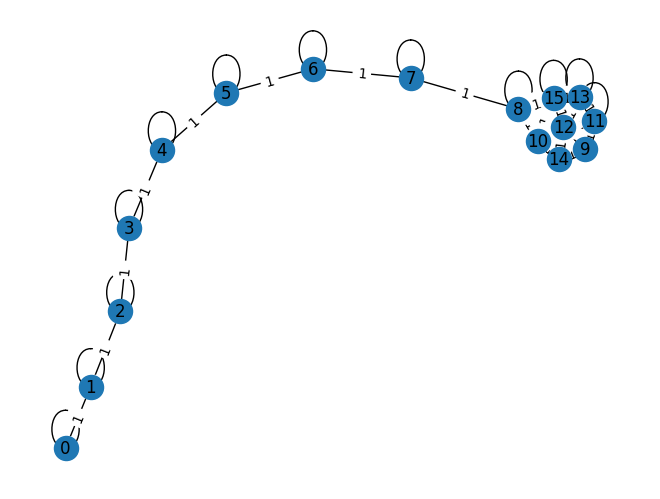

In [ ]:
candyToPrint = createACandy(16)
plot_graph(candyToPrint)

In [ ]:
### QUESTION 2 ###

In [ ]:
### Question 2.1 ### 
# find the stationary vector of the narmalized graphs

clique_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_Clique, 5000, 1)
candy_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_Candy, 5000, 2000)
ring_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_Ring, 5000, 2000)
twoCliques_stationary_vector = run_multiple_limited_random_walk_stac_vector(normalize_TwoCliques, 5000, 2000)

In [ ]:
### Question 2.2 ###
error_rate = [0.25, 0.125, 0.0625, 0.03125, 0.015625]
num_of_steps = [4, 8, 16, 32, 64]
print("### Q2 ###")

#TODO: run on the 2^14 graph
#TODO: start runs from specific node [clique - (random, 0), candy - (random, from clique), ring - (random, 0), twoCliques - (random, from clique)]
#TODO: avg the results into a file (run 10 times for each option)

In [ ]:
#Q2 - Clique
curr_graph = normalize_Clique
print("Graph: Clique")
print("=====================================")
for j in range(len(num_of_steps)):
    print("## Number of steps: " + str(num_of_steps[j]))
    for i in range(len(error_rate)):
        print("---- Error rate:  " + str(error_rate[i]))
        num_of_runs = page_rank_algo(curr_graph, num_of_steps[j], error_rate[i], clique_stationary_vector)
        print("     num of runs: " + str(num_of_runs))
    print("=====================================")


In [ ]:
#Q2 - Candy
curr_graph = normalize_Candy
print("Graph: Candy")
print("=====================================")
for j in range(len(num_of_steps)):
    print("## Number of steps: " + str(num_of_steps[j]))
    for i in range(len(error_rate)):
        print("---- Error rate:  " + str(error_rate[i]))
        num_of_runs = page_rank_algo(curr_graph, num_of_steps[j], error_rate[i], clique_stationary_vector)
        print("     num of runs: " + str(num_of_runs))
    print("=====================================")

In [ ]:
#Q2 - Ring
curr_graph = normalize_Ring
print("Graph: Ring")
print("=====================================")
for j in range(len(num_of_steps)):
    print("## Number of steps: " + str(num_of_steps[j]))
    for i in range(len(error_rate)):
        print("---- Error rate:  " + str(error_rate[i]))
        num_of_runs = page_rank_algo(curr_graph, num_of_steps[j], error_rate[i], clique_stationary_vector)
        print("     num of runs: " + str(num_of_runs))
    print("=====================================")

In [ ]:
#Q2 - Two Cliques
curr_graph = normalize_TwoCliques
print("Graph: Two Cliques")
print("=====================================")
for j in range(len(num_of_steps)):
    print("## Number of steps: " + str(num_of_steps[j]))
    for i in range(len(error_rate)):
        print("---- Error rate:  " + str(error_rate[i]))
        num_of_runs = page_rank_algo(curr_graph, num_of_steps[j], error_rate[i], clique_stationary_vector)
        print("     num of runs: " + str(num_of_runs))
    print("=====================================")